# TimeCourse

Supported Features:

    - Run an deterministic time course. 
    - Control report arguments
    - Alternative visualization to native COPASI
    
To do:

    - Implement alternative solvers 
    - Stochastic ensemble time course generation

## Imports and Getting the Test Model

In [13]:
%matplotlib inline
import os,glob
import site
site.addsitedir('/home/b3053674/Documents/PyCoTools')
import PyCoTools
from PyCoTools.PyCoToolsTutorial import test_models
import os
import pandas
import logging
logging.basicConfig(format = '%(levelname)s:%(message)s')
LOG=logging.getLogger()

##this can be anywhere you like
tutorial_directory = '/home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial'
## module containing copasi models in string format
TM = test_models.TestModels()
kholodenko_model_string = TM.get_kholodenko_variant1() ## published kholodenko model
kholodenko_model = os.path.join(tutorial_directory, 'kholodenko_model.cps')

with open(kholodenko_model, 'w') as f:
    f.write(kholodenko_model_string)

LOG.info('written kholodenko model to {}'.format(kholodenko_model))
LOG.info('Checking that kholodenko file exists: ... {}'.format(os.path.isfile(kholodenko_model)))

INFO:root:<ipython-input-13-f58b6052b3b5>:<module>:23:written kholodenko model to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/kholodenko_model.cps
INFO:root:<ipython-input-13-f58b6052b3b5>:<module>:24:Checking that kholodenko file exists: ... True


### Run a Time Course

In [14]:
TC= PyCoTools.pycopi.TimeCourse(kholodenko_model,
                        report_name='kholodenko_timecourse_report.txt',
                        ## Intervals*StepSize must equal End
                        end=1000,    
                        intervals=50,
                        step_size=20)

## check its worked
LOG.info('Output file exists: {}'.format(os.path.isfile(TC.kwargs['report_name']))  )
LOG.info('Reading time course data: \n{}'.format(
    pandas.read_csv(
        TC.kwargs['report_name'],sep='\t').head()))


## change the 'manually_check_model' variable to True to have 
## python open the model so you can see the configured time course
manually_check_model = False
if manually_check_model:
    os.system('CopasiUI {}'.format(kholodenko_model))

INFO:root:<ipython-input-14-edff1edaf221>:<module>:9:True
INFO:root:<ipython-input-14-edff1edaf221>:<module>:10:   Time  [Mek1-PP]   [Erk2]    [Mos]  [Erk2-P]  [Erk2-PP]  [Mos-P]   [Mek1]  \
0     0   10.00000  280.000  90.0000   10.0000   10.00000  10.0000  280.000   
1    20    8.71021  280.012  71.2642   11.8575    8.13013  28.7358  277.411   
2    40   12.80150  279.667  51.9740   13.1953    7.13743  48.0260  267.121   
3    60   22.48010  276.391  34.1268   15.5743    8.03502  65.8732  249.300   
4    80   37.55980  267.755  21.0614   20.1063   12.13880  78.9386  225.277   

   [Mek1-P]  Values[Mek_tot]  Values[Erk_tot]  Values[Erk-P_tot]  \
0   10.0000              300              300            20.0000   
1   13.8792              300              300            19.9876   
2   20.0773              300              300            20.3327   
3   28.2199              300              300            23.6093   
4   37.1633              300              300            32.2450   

   V

0

## Be selective about which output variables to select

In [18]:
import pandas,os
import PyCoTools
TC=PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            report_name='kholodenko_timecourse_report.txt',
                            end=1000,
                            intervals=50,
                            step_size=20,
                            metabolites=['Mek1-P','Mek1'],
                            global_quantities = [])

##check that we only have two variables
LOG.info('\n{}'.format(pandas.read_csv(TC.kwargs['report_name'],sep='\t').head()) )

INFO:root:<ipython-input-18-662d7f1d0ac0>:<module>:12:
   Time  [Mek1-P]   [Mek1]
0     0   10.0000  280.000
1    20   13.8792  277.411
2    40   20.0773  267.121
3    60   28.2199  249.300
4    80   37.1633  225.277


## Plot the results

INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Erk2-PP.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Erk2-P.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Erk_tot.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Mos.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Mek-P_tot.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Mos-P.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Mek_tot.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Mek1.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./TimeCourseGraphs/Mek1-PP.png exists: 	 True
INFO:root:<ipython-input-19-939a7428de5c>:<module>:13:File ./Ti

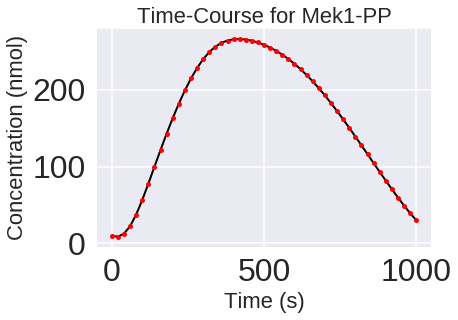

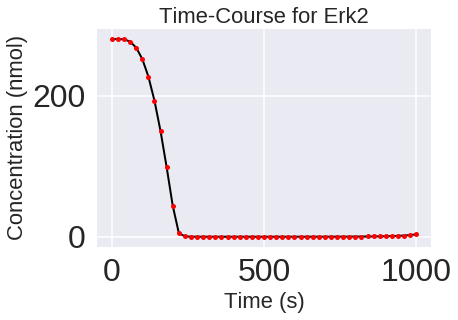

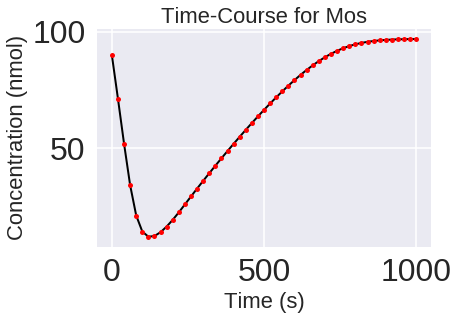

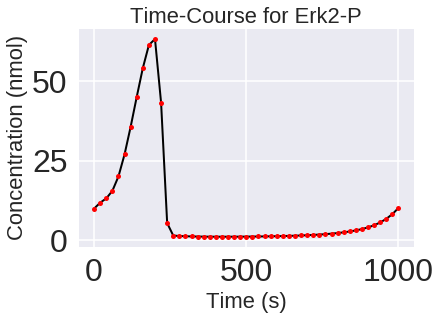

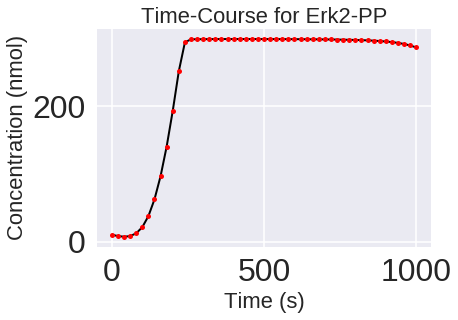

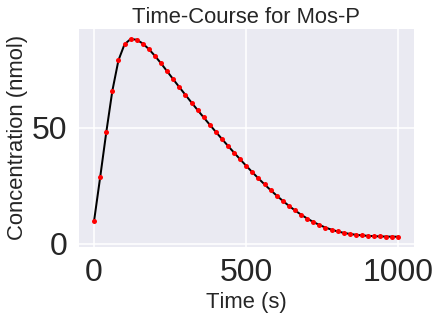

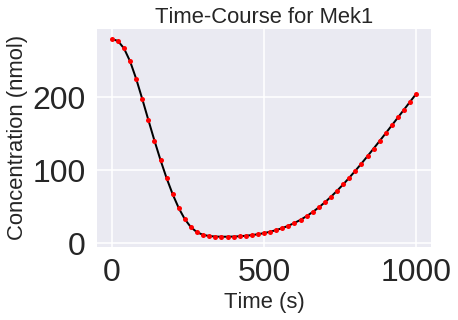

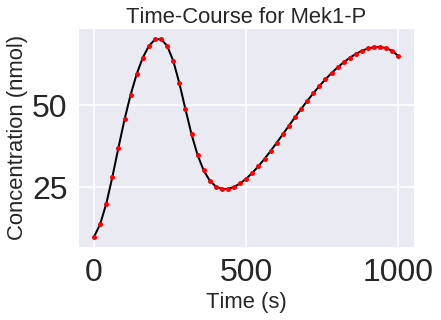

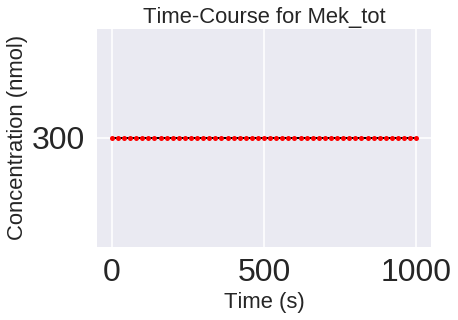

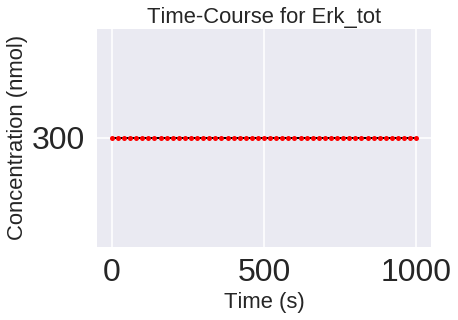

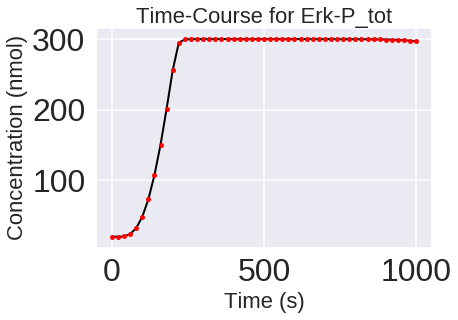

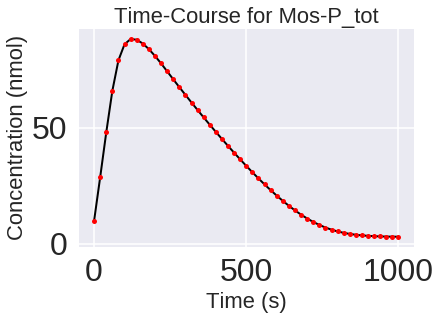

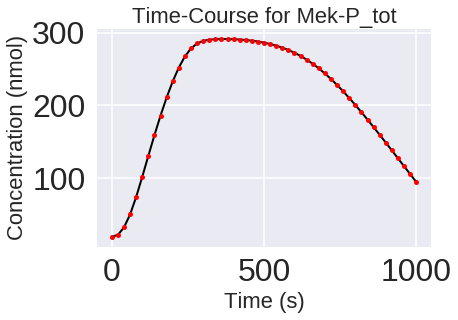

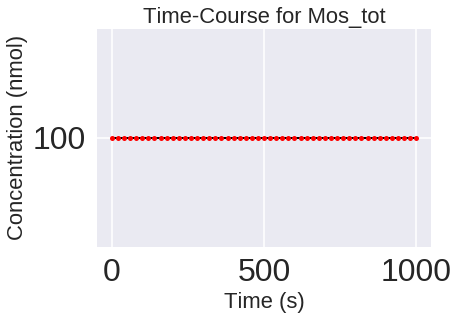

In [19]:
import PyCoTools,glob,os

TC = PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            report_name='kholodenko_timecourse_report.txt',
                            end=1000,
                            intervals=50,
                            step_size=20,
                            plot=True,
                            savefig=True)

## check png files exist
for i in glob.glob('./TimeCourseGraphs/*'):
    LOG.info('File {} exists: \t {}'.format(i,os.path.isfile(i)) )
    

## Play around with graphics

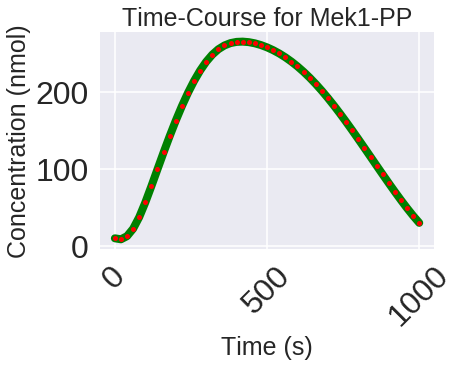

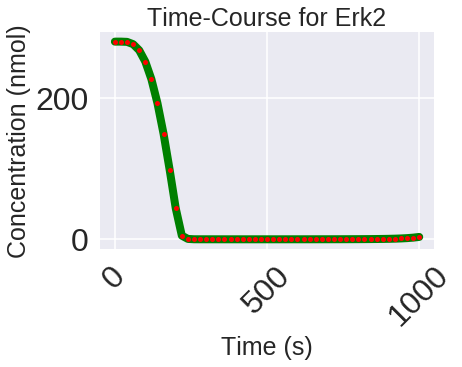

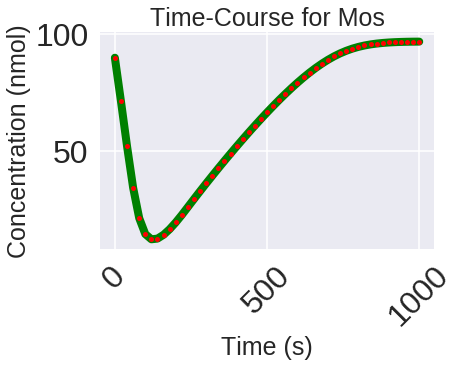

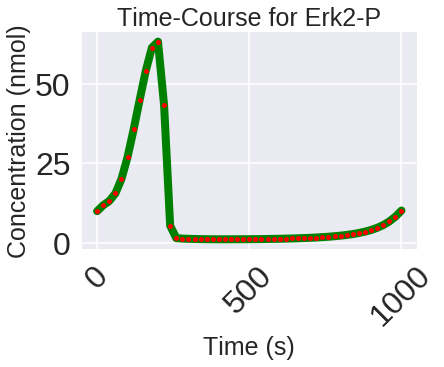

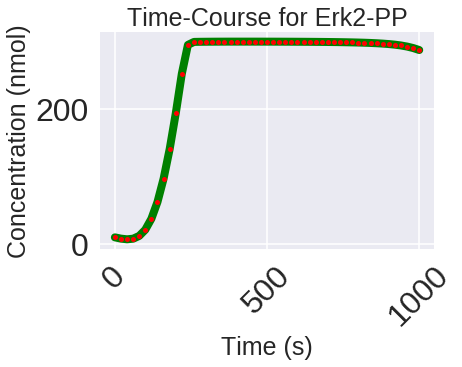

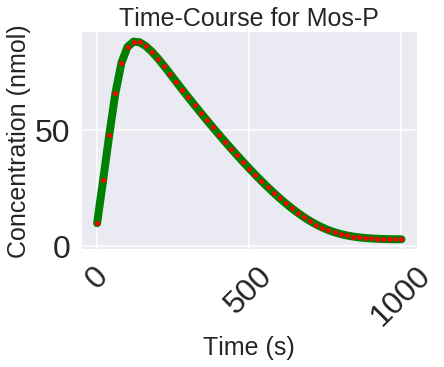

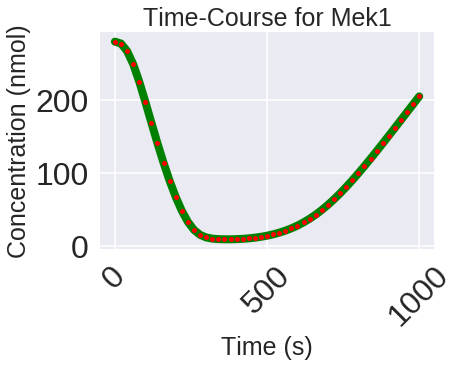

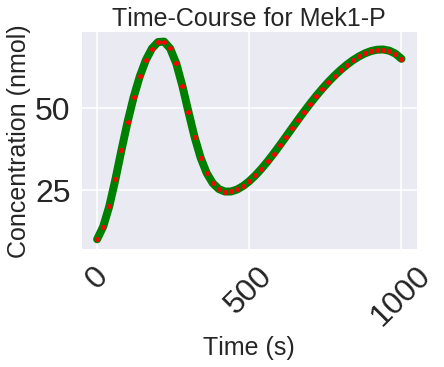

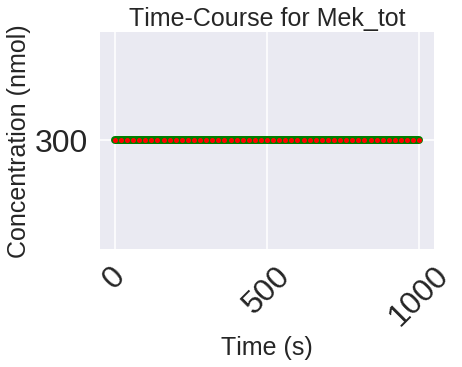

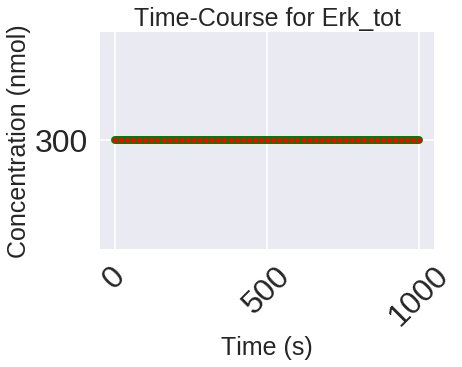

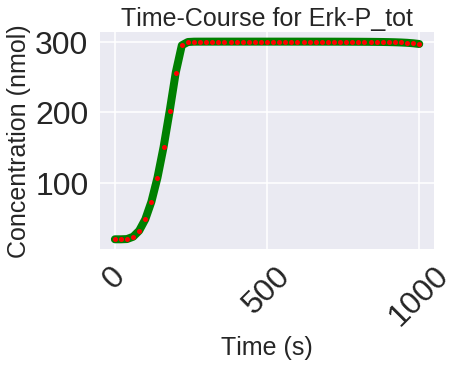

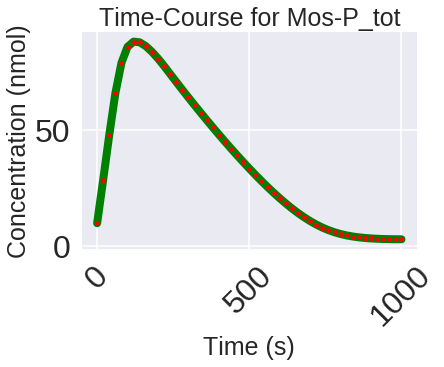

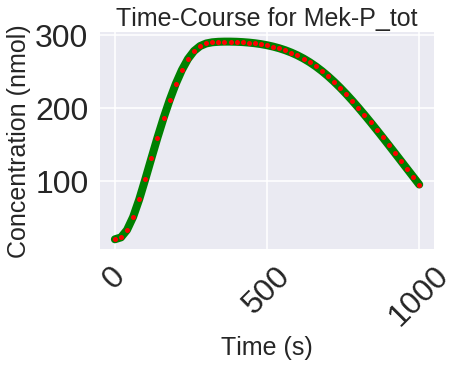

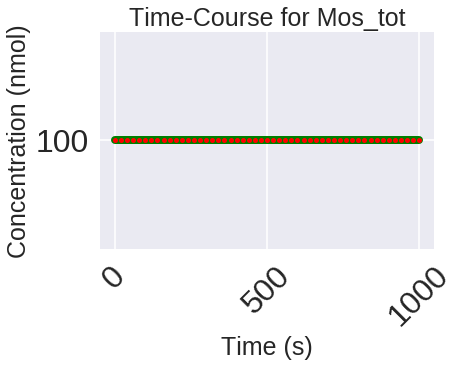

In [24]:
import os,PyCoTools
PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            report_name='kholodenko_timecourse_report.txt',
                            end=1000,
                            intervals=50,
                            step_size=20,
                            plot=True,
                            savefig=True,
                            line_width=8,
                            marker_size=5,
                            line_color='g',
                            axis_size=20,
                            font_size=25,
                            line_style='-',
                            xtick_rotation=45)